# Using the data from Web Of Science


The doi is given in the 'cited-references' field: 

-  Manual export of a bibtex file.

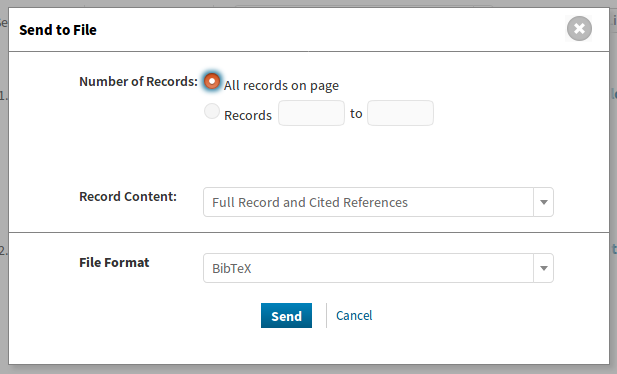

1. import the bibtex file
2. Query Crossref for each doi/ cache
3. merge the metadata from Crossref


3. eventually, look for missing references
    - by Query Crossref for the formatted reference resolution: obtain DOI


4. build the graph upward by specifyiing the starting node


https://www.webofknowledge.com


## How to merge:
- overwrite
- union: set(doi)

In [63]:
import bibtexparser as bib

In [64]:
import crossrefexp as exp

In [65]:
store = exp.MetaDataStore('data/from_WOK_Gao.pickle')

default pickle location set to data/from_WOK_Gao.pickle


growth achieved - 17 nodes in the graph. The last generation number is 1.
growth achieved - 196 nodes in the graph. The last generation number is 2.
graphs/Gao2015_gen2_top20_noSecondaryLink.svg  saved


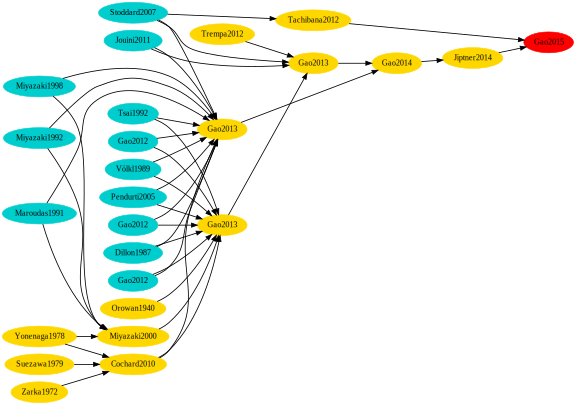

In [81]:
doi = '10.1016/0167-6423(89)90039-7'
doi = '10.1016/j.jcrysgro.2014.11.011'
# Build the graph and everything:
gr = store.get_refgraphviz( doi, gen=2, top=20, draw_secondary_links=False )
gr

In [82]:
# Look for article without ref. in the store:
# then do the research on WOK, save the bibtex file
missing_ref = []
for doi, metadata in store.items():
    
    if 'reference' not in metadata:
        missing_ref.append(doi)
    
print('search text:')    
print( 'DO=('+' or '.join(missing_ref)+')' )

search text:
DO=(10.1016/s0022-0248(97)00389-8 or 10.1016/s0040-6090(00)00986-x or 10.1088/0965-0393/13/2/007 or 10.1016/0022-0248(89)90255-8 or 10.1016/0022-0248(86)90445-8 or 10.1016/0022-0248(92)90325-d or 10.1016/s0022-0248(97)00388-6 or 10.1016/j.jcrysgro.2010.11.009 or 10.1016/0022-0248(87)90163-1 or 10.1016/0022-0248(91)90388-l or 10.1021/cg301225w or 10.1016/0022-5096(72)90010-5 or 10.1016/0022-0248(89)90067-5)


In [74]:
# Open the bibitex file:
datafile = 'bibtex_data/savedrecs-7.bib'

with open(datafile) as bibtex_file:
    bibdata = bib.load(bibtex_file)

bibtex_data = [ entry for entry in bibdata.entries if 'doi' in entry ]

print(len(bibtex_data))

21


In [75]:
# Look for references with a DOI:
ref_from_wos = {}
for entry in bibtex_data:
    doi = entry['doi'].strip('{}')
    
    cited_references = entry['cited-references']
    cited_references = cited_references.strip('{}').split('\n')

    cited_doi = [ref.split(' DOI')[-1].strip('. ')
                 for ref in cited_references if ' DOI ' in ref]
    
    ref_from_wos[doi] = cited_doi
    
ref_from_wos

{'10.1016/0001-6160(82)90184-5': ['10.1016/0036-9748(80)90353-1',
  '10.1016/S0036-9748(74)80010-4',
  '10.1016/0001-6160(80)90162-5',
  '10.1016/0001-6160(60)90127-9',
  '10.1139/p67-055',
  '10.1016/0001-6160(60)90001-8',
  '10.1016/0001-6160(66)90290-2',
  '10.1090/qam/59769',
  '10.2320/matertrans1960.18.852',
  '10.1016/0025-5416(80)90107-X',
  '10.2320/matertrans1960.16.629',
  '10.1016/0001-6160(71)90083-6'],
 '10.1016/0022-0248(92)90322-A': ['10.2514/3.26236',
  '10.1143/JJAP.16.737',
  '10.1016/0022-0248(87)90163-1',
  '10.1063/1.93261',
  '10.1063/1.339129',
  '10.1007/BF01378125',
  '10.1115/1.3157747',
  '10.1016/0022-0248(80)90287-0',
  '10.1002/j.1538-7305.1980.tb03024.x',
  '10.1063/1.329154',
  '10.1016/0022-0248(91)90388-L',
  '10.1016/0022-0248(90)90058-S',
  '10.1016/0022-0248(91)90350-E',
  '10.1016/0022-0248(91)90033-2',
  '10.1016/0022-0248(85)90390-2',
  '10.1016/0022-0248(91)90159-3',
  '10.1080/01418619008234938',
  '10.1002/pssa.2210490110',
  '10.1002/pssa.22

In [78]:
# Merge with store
for doi, refs in ref_from_wos.items():
    doi = doi.lower()
    try:
        store[doi]['reference'] = [ {'DOI':doi_ref} for doi_ref in refs ]
    except KeyError:
        print(doi)

## old

In [19]:
store.query( doi_list )

Requesing 2 metadata:
Query performed in 0.343652 s. (2 doi)
2 metadata returned for 2 asked
data/from_WOK.pickle saved.


In [35]:
store.query('10.1016/0012-365X(93)90164-O')

Requesing 1 metadata:
Query performed in 0.520454 s. (1 doi)
1 metadata returned for 1 asked
data/from_WOK.pickle saved.


In [11]:
# without a doi:
len( [ entry for entry in bibdata.entries if 'doi' not in entry ] )

0

In [18]:
doi_list = list( scopus_data.keys()  )

Requesing 4 metadata:..
0 metadata returned for 0 asked
data/fromScopus02.pickle saved.
growth achieved - 442 nodes in the graph. The last generation number is 1.
Requesing 44 metadata:
Query performed in 2.202163 s. (43 doi)
43 metadata returned for 43 asked
data/fromScopus02.pickle saved.
growth achieved - 1770 nodes in the graph. The last generation number is 2.
Requesing 208 metadata:
Query performed in 1.594143 s. (92 doi)
Query performed in 0.936966 s. (92 doi)
Query performed in 0.731033 s. (20 doi)
204 metadata returned for 204 asked
data/fromScopus02.pickle saved.
growth achieved - 6969 nodes in the graph. The last generation number is 3.
graphs/Eisenberg1970Sato200_gen3_top3_noSecondaryLink.svg  saved


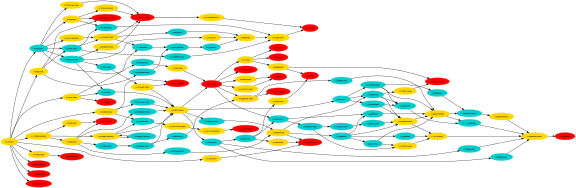

In [26]:
# Build the graph and everything:
gr = store.get_refgraphviz( doi_list, gen=3, starting_from=[doi_start], draw_secondary_links=False )
gr

In [ ]:
missing_refs = []
for doi, scopus_metadata in scopus_data.items():
    metadata = store.get(doi)
    n_refs = metadata.get('references-count')
    metadata_refs = metadata.get('reference', [])
    n_refs_given = len(metadata_refs)
    n_refs_with_doi = len([ref for ref in metadata_refs if 'DOI' in ref ])
    
    n_refs_scopus = len( scopus_data[doi]['references'].split(';') )
    print( n_refs, n_refs_given, n_refs_with_doi, n_refs_scopus )
    
    if n_refs_with_doi>2:
        break
        
doi

In [ ]:
metadata['reference']

exemple of non regex matched doi but existing:

    10.1002/1521-3951(200010)221:2<583::aid-pssb583>3.0.co;2-f



## Retrieving the ref using scopus data
https://www.crossref.org/labs/resolving-citations-we-dont-need-no-stinkin-parser/

input:
- refs with doi from crossref
- ref_text from scopus -> query all -> {doi:metadata}

In [ ]:
import requests
import urllib.parse

In [ ]:
def query_crossref_biblio(ref_text, mailadress=''):
    """ Query Crossref for the given formatted reference text."""
    
    print( 'Query for "{}..."'.format( ref_text[:60] ), end='\r' )
    minimum_score_required = 40
    
    url = "https://api.crossref.org/works"

    params = {'mailto': mailadress,
              'query.bibliographic':ref_text}

    response = requests.get(url, params=params)
    
    if not response.ok:
        print('query error: %s' % response.content)
    else:
       
        r = response.json()
        items = r['message']['items']

        sorted_match = sorted( items, key=lambda x:x['score'], reverse=True )
        best_match = sorted_match[0]
        
        print( ' '*80, end='\r' )
        print( 'Query answered in {:3f} s. Score: {}'.format( response.elapsed.total_seconds(), best_match['score'] ) )
    
    
    if best_match['score'] > minimum_score_required:
        return best_match
    else:
        return None


In [ ]:
bib_metadata = bibdata.entries[2]

In [ ]:
doi = bib_metadata['doi']
doi

In [ ]:
references = bib_metadata['references'].split(';')
references = [ ref.strip() for ref in references ]
print('\n'.join(references))


references_doi = []

for ref_text in references:
    best_match = query_crossref_biblio( ref_text )

    if best_match:
        match_doi = best_match['DOI']
        references_doi.append(match_doi)
        
        if match_doi not in store:
            store[match_doi] = best_match
            

In [ ]:
len( references_doi )

In [ ]:
metadata = store[doi]

In [ ]:
metadata['references-count']

In [ ]:
ref_text = references[12]

best_match = query_crossref_biblio( ref_text )
best_match